<a href="https://colab.research.google.com/github/TAFIMnoor/Machine-Learning-Lab/blob/main/Final%20Lab%20Assignments/Image_Classify_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/My\ Drive/CNN_dataset.zip

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the parameters for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


In [4]:
data_dir = '/content/CNN_dataset'
batch_size = 32

In [5]:

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training' 
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation' 
)


Found 40000 images belonging to 5 classes.
Found 10000 images belonging to 5 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 64)        0

In [ ]:
from keras.optimizers import RMSprop

optimizer = RMSprop(lr=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
1250/1250 [==============================] - 161s 121ms/step - loss: 0.2392 - accuracy: 0.9204 - val_loss: 0.0475 - val_accuracy: 0.9849
Epoch 2/10
1250/1250 [==============================] - 149s 119ms/step - loss: 0.1099 - accuracy: 0.9738 - val_loss: 0.0190 - val_accuracy: 0.9963
Epoch 3/10
1250/1250 [==============================] - 149s 119ms/step - loss: 0.0971 - accuracy: 0.9775 - val_loss: 0.0310 - val_accuracy: 0.9961
Epoch 4/10
1250/1250 [==============================] - 162s 130ms/step - loss: 0.1032 - accuracy: 0.9805 - val_loss: 0.0114 - val_accuracy: 0.9988
Epoch 5/10
1250/1250 [==============================] - 150s 120ms/step - loss: 0.0962 - accuracy: 0.9828 - val_loss: 0.0195 - val_accuracy: 0.9952
Epoch 6/10
1250/1250 [==============================] - 148s 118ms/step - loss: 0.1168 - accuracy: 0.9825 - val_loss: 0.0090 - val_accuracy: 0.9984
Epoch 7/10
1250/1250 [==============================] - 150s 120ms/step - loss: 0.1017 - accuracy: 0.9816 - val_

In [10]:
test_loss, test_acc = model.evaluate(val_generator)
print('Test accuracy:', test_acc)

313/313 [==============================] - 28s 91ms/step - loss: 0.0185 - accuracy: 0.9983
Test accuracy: 0.9983000159263611


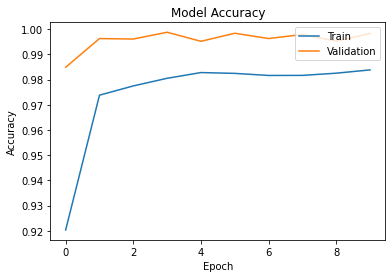

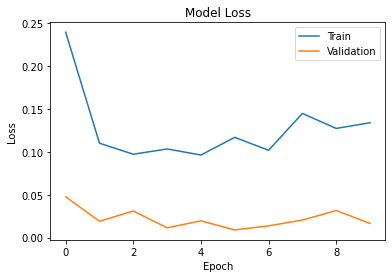

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()